In [1]:
import pandas as pd
import math
import plotly.express as px
import matplotlib.pyplot as plt

In [9]:
df_open = pd.read_csv('./rori_unavailable_times_open_line_2023-10-01-2023-11-17.csv')
df_rising = pd.read_csv('./rori_unavailable_times_schools_line_2023-10-01-2023-11-17.csv')


In [10]:
df = pd.concat([df_open, df_rising])

In [51]:
def utterance_category(text):
    if 'Level' in str(text): 
        return 'Level Menu'
    elif text in ['Linear Expressions', 'Compare and order ', 'Multiply and divide ', 'Scientific notations']:
        return 'Skill Menu'
    elif text in ['Ah ok👍🏿', 'Cool 👍🏿', '🙌🏾👍🏾', '🤩', '🤓', 'Yes, show hint', 'Sure, Rori 👍🏿', 'Sounds good🙂', 'Okay 🙂', 'Okay, Rori 🙂', 'I get it ✌🏿', 'Got it 😎', 'Cool 👍🏿', 'Continue', '✅', 'No, try again']: 
        return 'Math Quiz Button'
    elif ((type(text) is int or type(text) is float) and (not math.isnan(text))) or (text in ['A', 'B', 'C', 'D', 'T', '>', '<', 'Yes', 'No' ]):
        return 'Math Answer'
    elif text in ['Menu', 'math', 'menu', 'Math', 'Stop']:
        return 'Keyword'
    elif text in ['Hi']:
        return 'Hi'
    else:
        return 'Other' 
                                

In [52]:
df['last_message_type']= df.apply(lambda row: utterance_category(row['prev_text']), axis=1)

In [53]:
counts = df['last_message_type'].value_counts()


<BarContainer object of 7 artists>

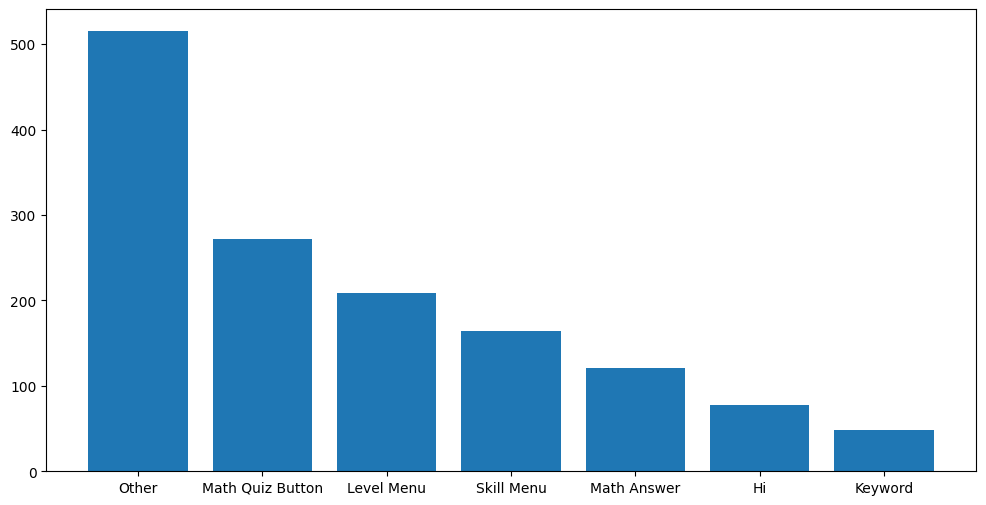

In [56]:
plt.figure(figsize=(12,6))
plt.bar(counts.index, counts)


In [58]:
df['inserted_at'] = pd.to_datetime(df['inserted_at'])
df_rising['inserted_at'] = pd.to_datetime(df['inserted_at'])



Text(0.5, 1.0, 'Timeline of Events')

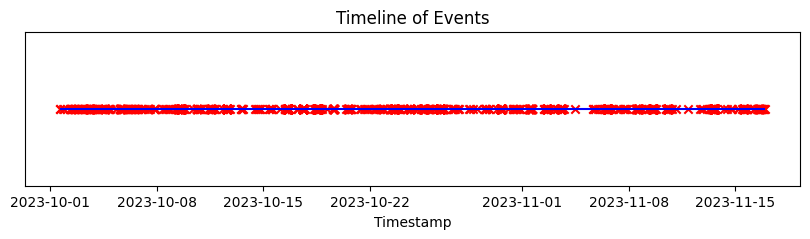

In [60]:
plt.figure(figsize=(10, 2))  # Adjust the size as needed
plt.hlines(y=1, xmin=df['inserted_at'].min(), xmax=df['inserted_at'].max(), color='blue')  # Horizontal line
plt.scatter(df['inserted_at'], [1]*len(df), color='red', marker='x')  # Events as red dots
plt.xlabel('Timestamp')
plt.yticks([])  # Hide y-axis ticks
plt.title('Timeline of Events')

In [7]:
messages_by_hour.head()


date_hour  count
0  2023-10-23 12:00:00+00    276
1  2023-11-17 11:00:00+00    964
2  2023-11-10 14:00:00+00   2088
3  2023-11-02 14:00:00+00   2326
4  2023-11-17 14:00:00+00     46

In [9]:
messages_by_hour=pd.read_csv('./rori_schools_inbound_messages_by_hour.csv')
events_by_hour = pd.read_csv('./rori_schools_events_by_hour.csv')


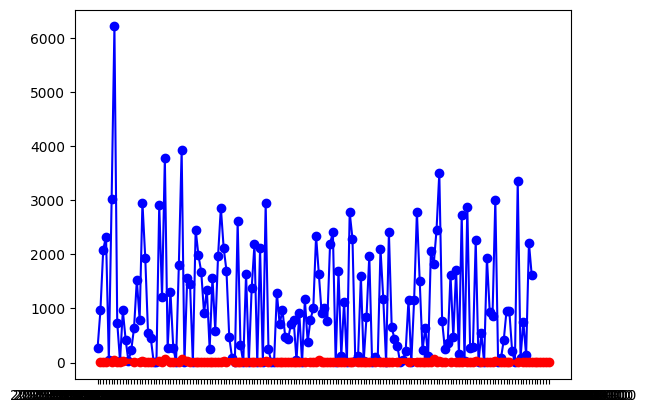

In [10]:
plt.plot(messages_by_hour['date_hour'], messages_by_hour['count'], marker='o', color='blue', linestyle='-')
plt.plot(events_by_hour['date_hour'], events_by_hour['count'], marker='o', color='red', linestyle='-')
